# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [ ]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [ ]:
baby_names = pd.read_csv('lab12_files/US_Baby_Names_right.csv')

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [ ]:
print(type(baby_names))
print(len(baby_names))

<class 'pandas.core.frame.DataFrame'>
1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [ ]:
baby_names[:10]

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id'

In [ ]:
baby_names.drop(columns=["Unnamed: 0","Id"])

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [ ]:
print("Men")
print(baby_names[baby_names.Gender=="M"].count()["Gender"])
print("Women")
print(baby_names[baby_names.Gender=="F"].count()["Gender"])

Men
457549
Women
558846


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [ ]:
baby_names['Name'].value_counts()[:10]

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: Name, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

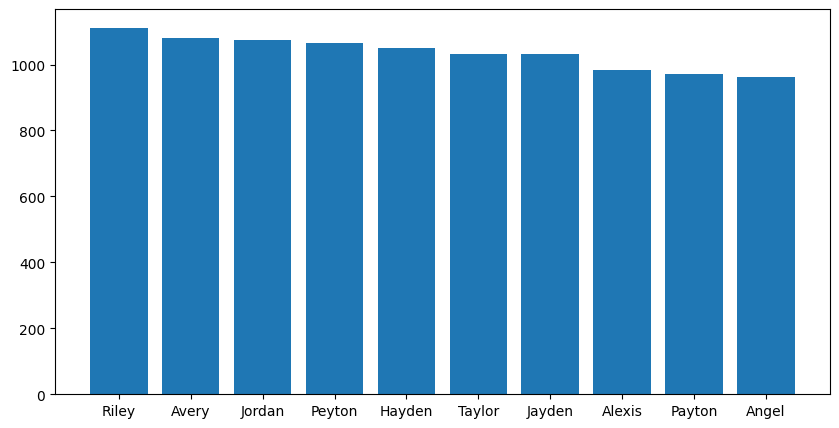

In [ ]:
names = baby_names.groupby('Name')['Name'].count().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
plt.bar(names.index, names.values)

<BarContainer object of 10 artists>

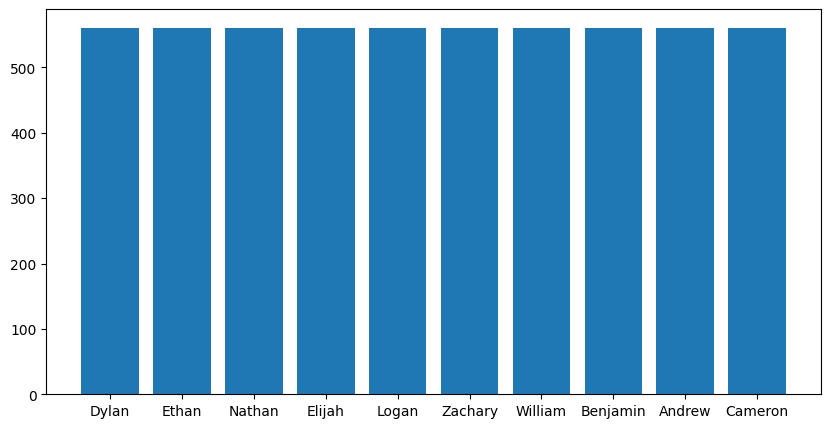

In [ ]:
names = baby_names[baby_names["Gender"]=='M'].groupby('Name')['Name'].count().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
plt.bar(names.index, names.values)

<BarContainer object of 10 artists>

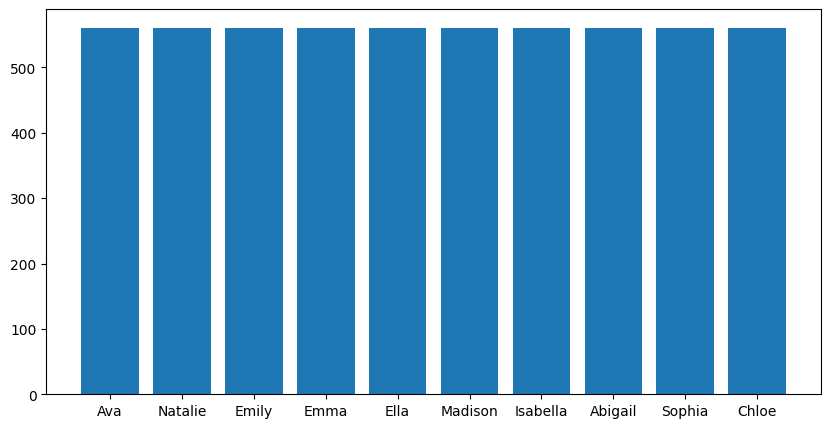

In [ ]:
names = baby_names[baby_names["Gender"]=='F'].groupby('Name')['Name'].count().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
plt.bar(names.index, names.values)

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [ ]:
print(len(baby_names['Name'].unique()))

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [ ]:
def generator():
  probs = baby_names['Name'].value_counts()
  return probs.sample(weights = probs)

for i in range(10):
  print(generator())

Antoine    215
Name: Name, dtype: int64
Katelynn    439
Name: Name, dtype: int64
Keshawn    177
Name: Name, dtype: int64
Gracie    520
Name: Name, dtype: int64
Giuseppe    80
Name: Name, dtype: int64
Kaylin    389
Name: Name, dtype: int64
Lilliana    386
Name: Name, dtype: int64
Randy    396
Name: Name, dtype: int64
Jayden    1031
Name: Name, dtype: int64
Michelle    465
Name: Name, dtype: int64


Krok 10:
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [ ]:
names = baby_names['Name'].value_counts()
names.idxmax()

'Riley'

In [ ]:
names.describe()

count    17632.000000
mean        57.644907
std        122.029964
min          1.000000
25%          2.000000
50%          8.000000
75%         39.000000
max       1112.000000
Name: Name, dtype: float64

## Część II

In [1]:
import pandas as pd

Krok 1: Wczytaj dane

In [12]:
ocupation = pd.read_csv('ocupation.csv', sep='|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [13]:
ocupation[:25]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [14]:
ocupation.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [15]:
print(ocupation.count())

user_id       943
age           943
gender        943
occupation    943
zip_code      943
dtype: int64


In [16]:
print(len(ocupation.columns))

5


Krok 5: Wypisz nazwy kolumn

In [17]:
print(ocupation.columns)

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')


Krok 6: Ile różnych zawodów jest w zbiorze?

In [21]:
print(len(ocupation['occupation'].unique()))

21


Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy:
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

<Axes: ylabel='occupation'>

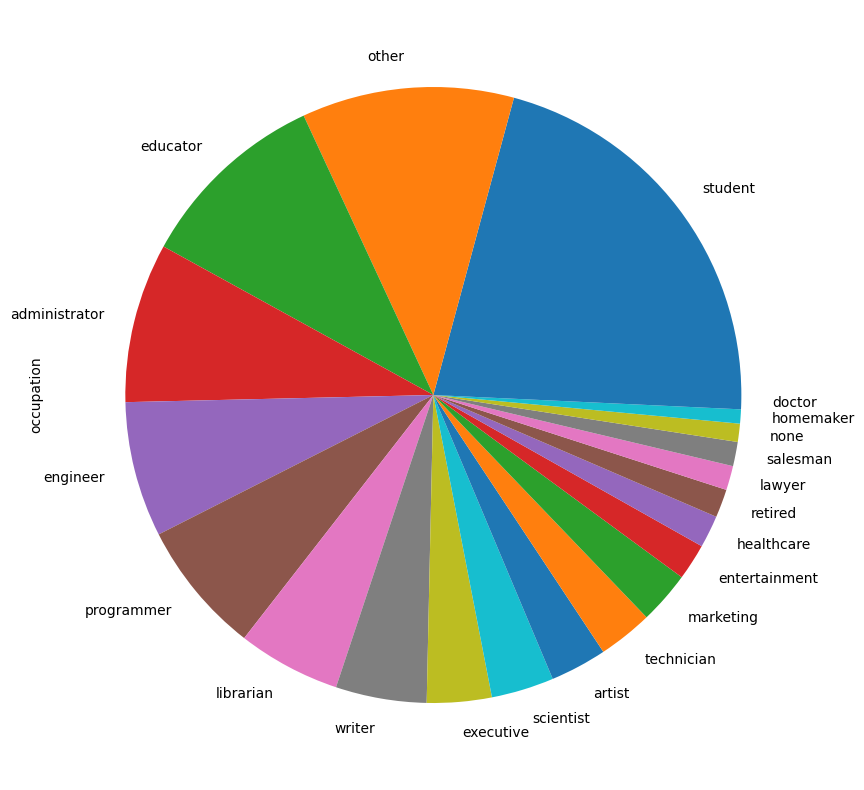

In [29]:
jobs = ocupation['occupation'].value_counts()
jobs.plot(kind='pie',figsize=(10,10))

<Axes: ylabel='occupation'>

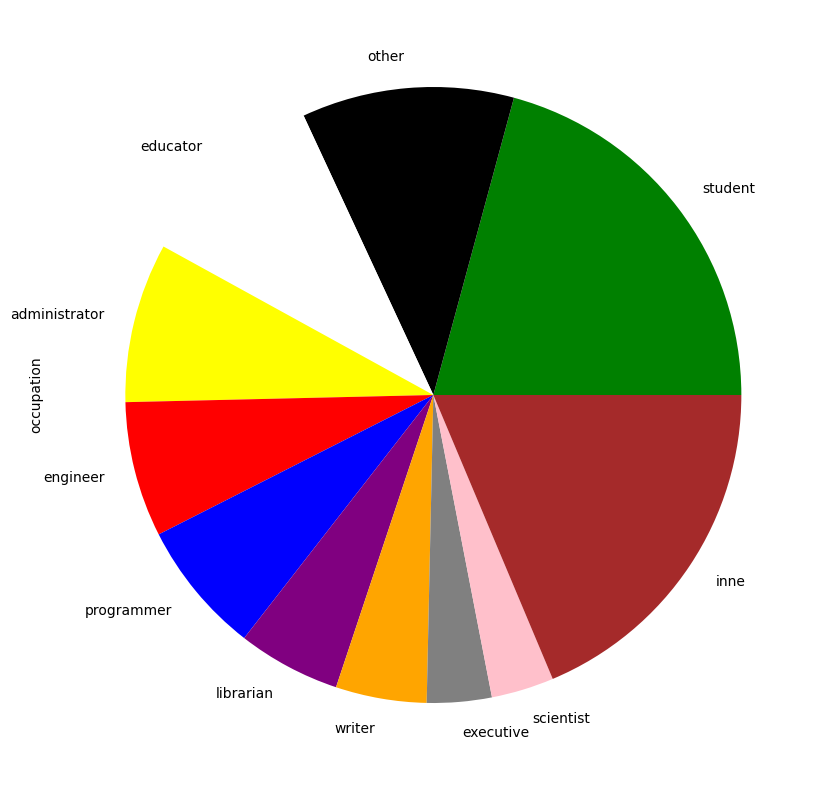

In [34]:
popular = jobs[:10]
popular['inne']=jobs[10:].sum()
popular.plot(kind='pie',figsize=(10,10), colors = ['green', 'black', 'white', 'yellow', 'red', 'blue', 'purple', 'orange', 'grey', 'pink', 'brown'] )

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

<Axes: xlabel='occupation'>

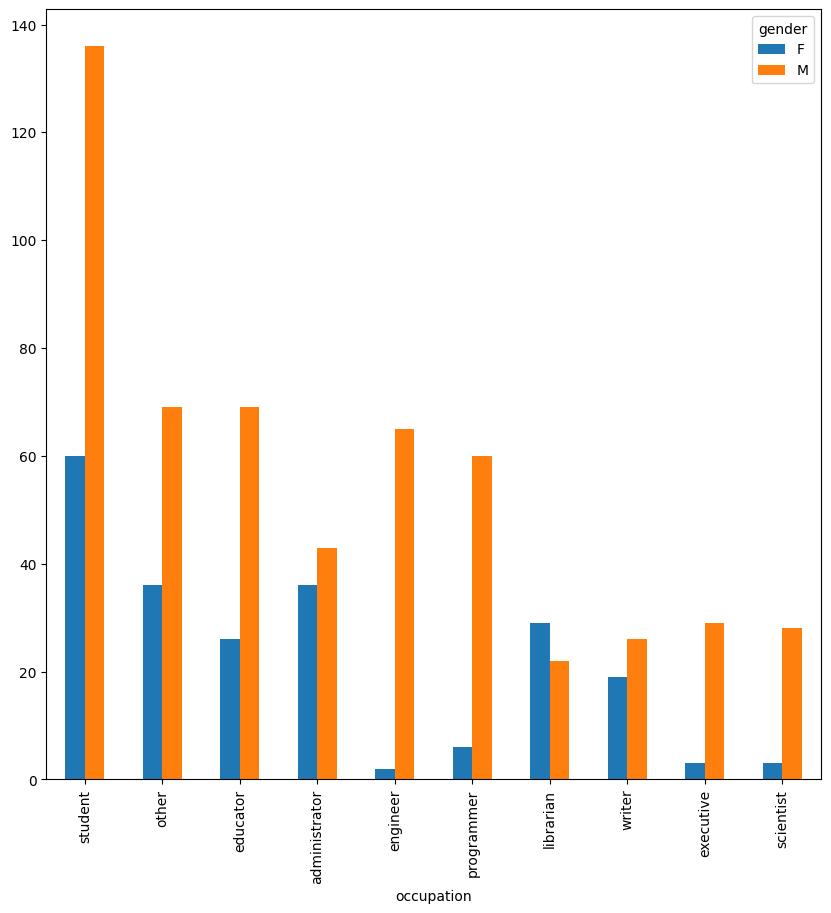

In [86]:
import matplotlib.pyplot as plt
ppl = ocupation.groupby(['occupation', 'gender']).size().unstack()
ppl['all'] = ppl.sum(axis=1)
ppl = ppl.sort_values(by='all', ascending=False)[:10]
del ppl['all']
ppl.plot.bar(figsize=(10, 10))

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

<Axes: xlabel='occupation'>

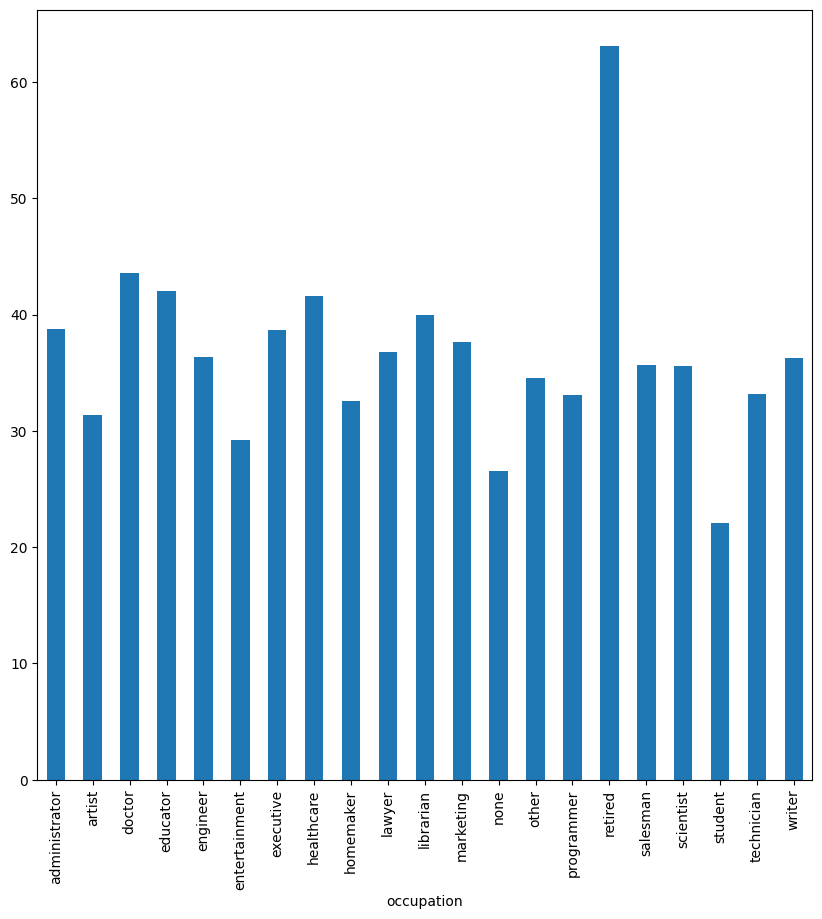

In [76]:
ocupation.groupby('occupation')['age'].mean().plot.bar(figsize=(10, 10))

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

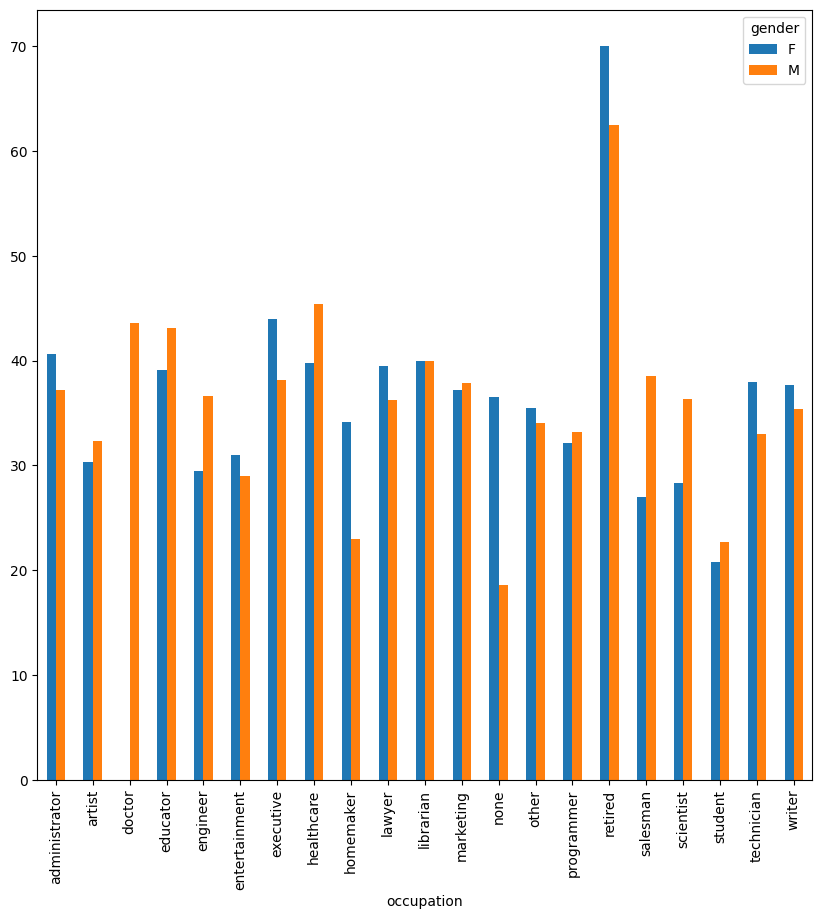

In [85]:
ppl = ocupation.groupby(['occupation', 'gender'])['age'].mean().unstack().plot.bar(figsize=(10, 10))